In [1]:
import sys
sys.path.append('..')
import pandas as pd
import importlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from BERTopic_kmeans import BERTopic_kmeans

/Users/jessicaluo/Desktop/BTT-Clorox-Company/clorox_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Similarity score using topic label vs using topic's top 15 words

In [2]:
file = '../../data/bertopic_kmeans_44subcats_top15words.csv'
df = pd.read_csv(file)
start_shape = df.shape

In [3]:
m = BERTopic_kmeans(df)
subcats = df['subcategory'].unique()

In [4]:
i= 1
for subcat in subcats:
    print(subcat, i)
    m.calculate_similarity_score(subcat, topic_words=True)
    i += 1
df = m.df
df.head()

FLOOR CLEANERS 1
Time to process chunk 0-1000: 13.64 seconds
Time to process chunk 1000-2000: 0.81 seconds
Total processing time: 14.45 seconds
BATHROOM CLEANERS MILDEW CLEANERS 2
Time to process chunk 0-1000: 6.43 seconds
Time to process chunk 1000-2000: 5.09 seconds
Time to process chunk 2000-3000: 4.58 seconds
Total processing time: 16.10 seconds
ODOR CONTROLLING AIR FRESHENERS 3
Time to process chunk 0-1000: 5.01 seconds
Time to process chunk 1000-2000: 4.95 seconds
Time to process chunk 2000-3000: 6.25 seconds
Time to process chunk 3000-4000: 5.30 seconds
Time to process chunk 4000-5000: 4.17 seconds
Time to process chunk 5000-6000: 4.66 seconds
Time to process chunk 6000-7000: 5.37 seconds
Time to process chunk 7000-8000: 5.42 seconds
Time to process chunk 8000-9000: 5.08 seconds
Time to process chunk 9000-10000: 5.54 seconds
Total processing time: 51.73 seconds
TOILET BOWL CLEANERS CONVENIENCE TB CLEANERS 4
Time to process chunk 0-1000: 5.22 seconds
Time to process chunk 1000-20

,subcategory,review_text,star_rating,bertopic_kmeans_topic_number,bertopic_kmeans_topic_words,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score,bertopic_kmeans_words_similarity_score
0,FLOOR CLEANERS,the mop be cheap the wringing attachment doesn...,1.0,0.0,"mop, use, floor, product, clean, buy, bad, wat...","""Mop fails to clean effectively""",0.554019,0.461669
1,BATHROOM CLEANERS MILDEW CLEANERS,this product be recommend for a front load was...,1.0,1.0,"mold, mildew, product, bleach, use, remove, st...","""Product causes mold and mildew, requires blea...",0.349462,0.296763
2,ODOR CONTROLLING AIR FRESHENERS,i keep multiple bottle in the bathroom and car...,5.0,0.0,"smell, scent, love, product, spray, like, grea...","""Fresh great scent and odor in air""",0.241971,0.102440
3,FLOOR CLEANERS,i recently just get this mop love how easy it ...,5.0,0.0,"use, clean, floor, great, product, work, carpe...","""Effective cleaning on floors, carpets, and ca...",0.300557,0.385834
4,TOILET BOWL CLEANERS CONVENIENCE TB CLEANERS,convenient and easy to utilize,4.0,1.0,"like, product, use, work, good, easy, great, b...","""Excellent product for easy use and great value""",0.465096,0.259800


In [5]:
if df.shape == start_shape:
    df.to_csv(file, index=False)

In [6]:
by_rating_topic = df.groupby(['subcategory', 'star_rating', 'bertopic_kmeans_topic_number']).agg({'review_text':'count', 'bertopic_kmeans_similarity_score': 'mean', 'bertopic_kmeans_words_similarity_score': 'mean'}).reset_index()
by_rating_topic = by_rating_topic.rename(columns={'review_text':'count'})
by_rating_topic.head()

,subcategory,star_rating,bertopic_kmeans_topic_number,count,bertopic_kmeans_similarity_score,bertopic_kmeans_words_similarity_score
0,ABRASIVE CLEANERS,1.0,0.0,154,0.259883,0.270177
1,ABRASIVE CLEANERS,1.0,1.0,90,0.229163,0.318818
2,ABRASIVE CLEANERS,2.0,0.0,46,0.245655,0.214834
3,ABRASIVE CLEANERS,2.0,1.0,32,0.330401,0.313512
4,ABRASIVE CLEANERS,3.0,0.0,63,0.194720,0.242049


In [7]:
by_rating = by_rating_topic.groupby(['subcategory', 'star_rating']).agg({'count':'sum', 'bertopic_kmeans_similarity_score': 'mean', 'bertopic_kmeans_words_similarity_score': 'mean'}).reset_index()
by_rating.loc[:, 'score_diff'] = by_rating['bertopic_kmeans_similarity_score'] - by_rating['bertopic_kmeans_words_similarity_score']
by_rating.head()

,subcategory,star_rating,count,bertopic_kmeans_similarity_score,bertopic_kmeans_words_similarity_score,score_diff
0,ABRASIVE CLEANERS,1.0,244,0.244523,0.294498,-0.049975
1,ABRASIVE CLEANERS,2.0,78,0.288028,0.264173,0.023855
2,ABRASIVE CLEANERS,3.0,123,0.303126,0.278665,0.024461
3,ABRASIVE CLEANERS,4.0,298,0.311645,0.319078,-0.007433
4,ABRASIVE CLEANERS,5.0,3684,0.328670,0.319127,0.009543


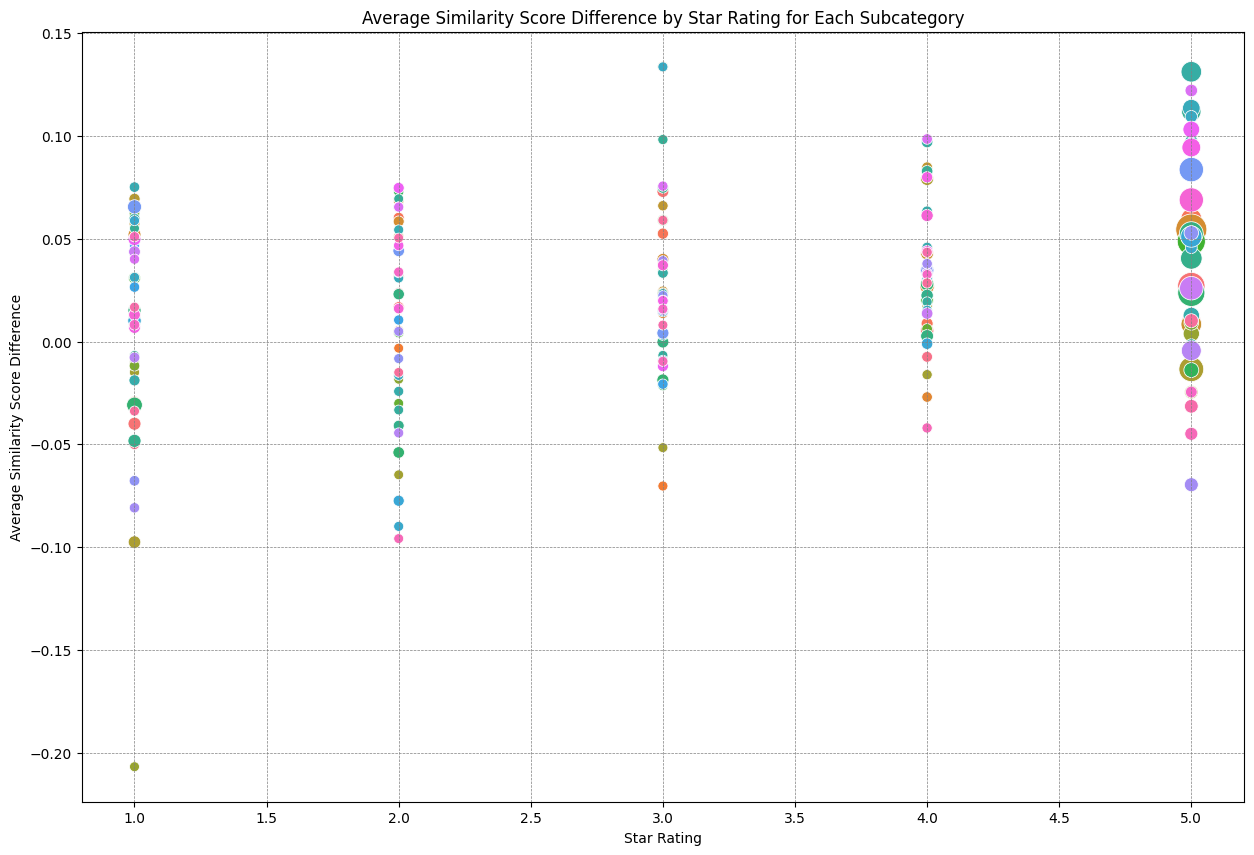

In [8]:
# plot the average similarity score by star rating for each subcategory using bubble plot
fig, ax = plt.subplots(figsize=(15, 10))
sns.scatterplot(data=by_rating, x='star_rating', y='score_diff', hue='subcategory', size='count', sizes=(50, 500), ax=ax)
plt.title('Average Similarity Score Difference by Star Rating for Each Subcategory')  # score using topic labels - score using words
plt.xlabel('Star Rating')
plt.ylabel('Average Similarity Score Difference')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend().remove()

## Positive difference = topic label is more similar to review text
## Negative difference = topic's top words are more similar to review text